In [1]:
import pandas as pd
import os
os.chdir("/home/eric/Nextcloud/Documents/Honors Capstone/nuclear/datasets/Bisconti")
dataframe1 = pd.read_excel("2206631 - Final Data excel .xlsx")

# Bisconti data set (2022)

## Interesting possible comparisons

*simple demographic comparisons*

Q10 vs Gender (Q1)  
Q10 vs Ethnicity (Q3)  
Q10 vs Q4 (Education)  
Q10 vs Q5a (Political views)  

*nuanced comparisons*
Q10 vs Q6r1: Q6r1: Affordable electricity - How important to you are the following considerations for the way electricity is produced?  
Q10 vs Q6r2: Reliable electricity - How important to you are the following considerations for the way electricity is produced?  
Q10 vs Q6r3: Clean air - How important to you are the following considerations for the way electricity is produced?  
Q10 vs Q6r4: Preservation of natural resources - How important to you are the following considerations for the way electricity is produced?  
Q10 vs Q6r5: Efficiency - How important to you are the following considerations for the way electricity is produced?
Q10 vs Q6r7: Economic growth - How important to you are the following considerations for the way electricity is produced?  
Q10 vs Q6r8: Job creation - How important to you are the following considerations for the way electricity is produced?  
Q10 vs Q6r9: Climate change solution - How important to you are the following considerations for the way electricity is produced?  
Q10 vs Q6r10: Resilience - How important to you are the following considerations for the way electricity is produced?  
Q10 vs Q6r11: Small footprint (less land use) - How important to you are the following considerations for the way electricity is produced?  

*since this is on a scale of important to not important, we need to flatten this structure to create a diagram of importance*

#### *We can use the Q7 version of these above questions to create a pie chart to show what Americans want the most in their energy*
Q7r1 vs Q7r2 vs Q7r3 vs Q7r4 vs Q7r5 vs Q7r6 vs Q7r7


*Glossary*
Q10 = Overall, do you strongly favor, somewhat favor, somewhat oppose, or strongly oppose the use of nuclear energy as one of the ways to provide electricity in the United States?'

In [2]:
os.chdir("/home/eric/Nextcloud/Documents/Honors Capstone/nuclear/datasets/Bisconti")
df_csv = pd.read_csv("output_file.csv")
#df_csv.columns

In [3]:
def plot_bar_or_pie(column, title, pie_flag = True, bar_flag = False):
    import plotly.express as px
    my_dict = {} # dictionary to hold list of strings of approval
    
    df2 = dataframe1[[column, "Q10"]] # grabs subset of questions
    for idx, row in df2.iterrows():
        #print(idx, row["hAge1"], row["Q10"])
        if(row[column] not in my_dict): #checks if category (ie 18-34, 45-50, 50+) is in dictionary or not.
            my_dict[row[column]] = [row["Q10"]]
            #print([row["Q10"]])
            pass
        else:
            my_dict[row[column]].append(row["Q10"])

            
    for key, val in my_dict.items():
        print(key)
        #print(val)
        print('Strongly favor:', val.count('Strongly favor'))
        print('Somewhat favor:', val.count('Somewhat favor'))
        print('Somewhat oppose:', val.count('Somewhat oppose'))
        print('Strongly oppose:', val.count('Strongly oppose'))

        att_list = [val.count('Strongly favor'), val.count('Somewhat favor'), val.count('Somewhat oppose'), val.count('Strongly oppose')]
        att_list_types = ['Strongly favor', 'Somewhat favor', 'Somewhat oppose', 'Strongly oppose']
        fig = px.bar(x = att_list_types, y = att_list, title=title.format(key=key), template='plotly_dark').update_layout(
        xaxis_title="Attitudes", yaxis_title="Number of responses"
    )
        if bar_flag:
            fig.show()

        #template='plotly_dark' for dark mode
        fig = px.pie(values = att_list, names = att_list_types, title=title.format(key=key))
        if pie_flag:
            fig.show()

In [4]:
def plot_whole_population(column, title, pie_flag = True, bar_flag = False):
    import plotly.express as px
    my_dict = {} # dictionary to hold list of strings of approval
    
    df_col_list = dataframe1[column].tolist() # grabs subset of questions
    
    att_list_types = list(set(df_col_list))
    att_list = [val.count('Strongly favor'), val.count('Somewhat favor'), val.count('Somewhat oppose'), val.count('Strongly oppose')]
    
#plot_whole_population("Q6r2", "Test")

In [25]:
def mean_df_gen(col_name):
    #Mean of groups
    temp_df = dataframe1[[col_name, "Q10"]].copy()
    temp_df['Q10'] = temp_df['Q10'].map({"Strongly oppose": 1, "Somewhat oppose": 2, "Somewhat favor": 3, "Strongly favor": 4})
    mean_df = temp_df.groupby([col_name])['Q10'].mean().reset_index().copy()
    return mean_df

In [5]:
#plot_bar_or_pie("hAge1", "Attitudes towards nuclear energy in {key} year olds")

In [6]:
#plot_bar_or_pie("hAge2", "Attitudes towards nuclear energy in {key} year olds")

In [7]:
#plot_bar_or_pie("Q4", "Attitudes towards nuclear energy from people have the following education: {key}")

In [8]:
#plot_bar_or_pie("Q3", "Attitudes towards nuclear energy with {key}s")

In [9]:
#plot_bar_or_pie("Q5a", "Attitudes towards nuclear energy who's political views are generally {key}")

### Histograms

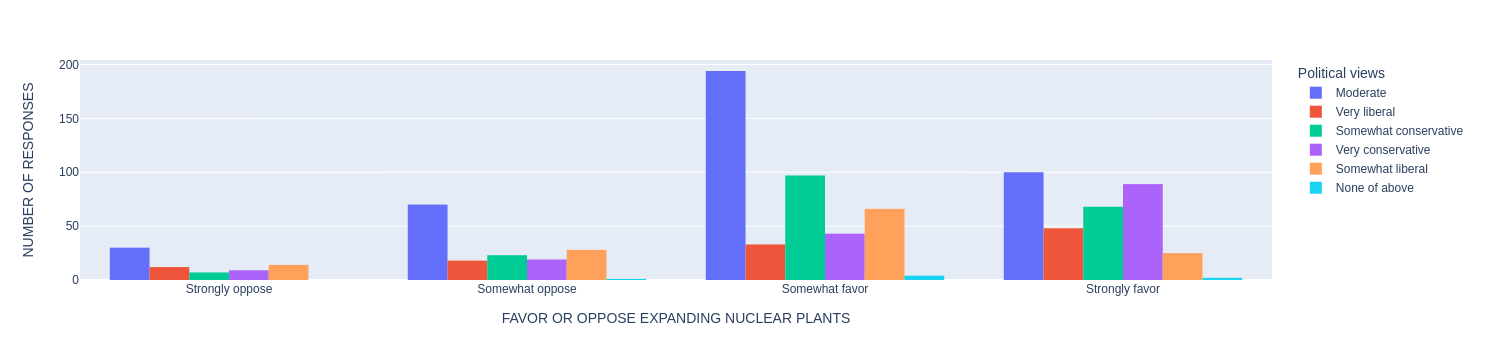

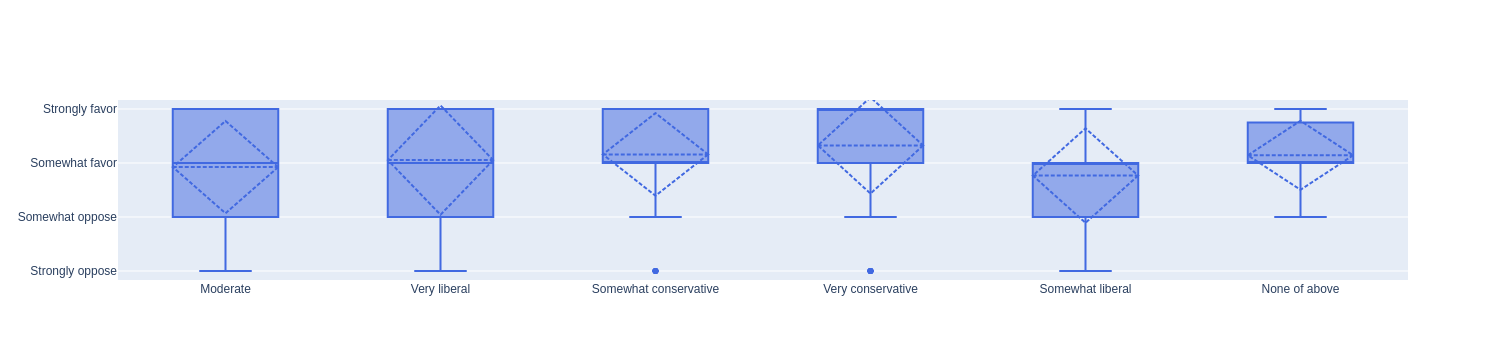

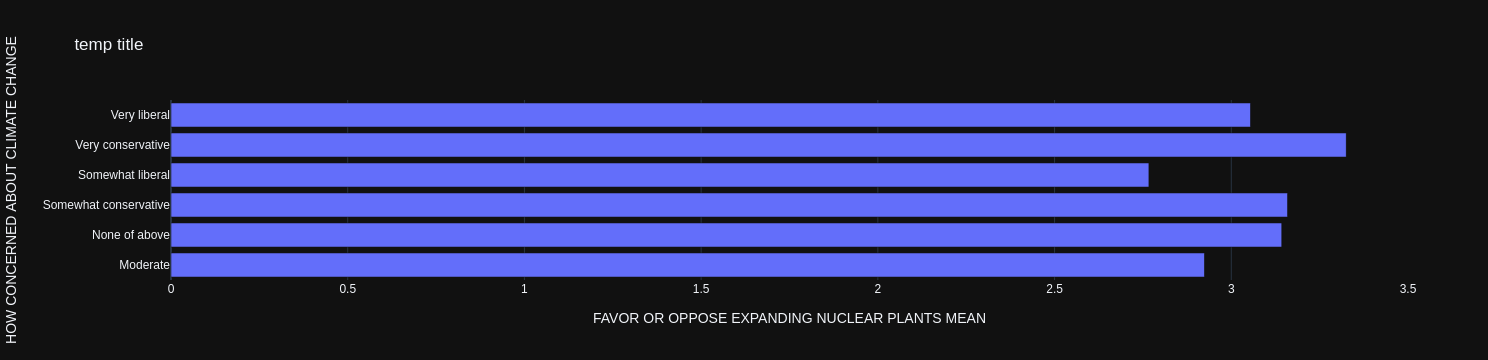

In [28]:
import plotly.express as px
import plotly.graph_objects as go

fav_list = ["Strongly oppose", "Somewhat oppose", "Somewhat favor", "Strongly favor"]

fig = px.histogram(dataframe1, x="Q10", color="Q5a", barmode="group").update_xaxes(categoryorder='array', categoryarray=fav_list).update_layout(
xaxis_title="FAVOR OR OPPOSE EXPANDING NUCLEAR PLANTS", yaxis_title="NUMBER OF RESPONSES", legend_title="Political views",
)
fig.show()

fig = go.Figure()
fig.add_trace(go.Box(
    y=dataframe1["Q10"],
    x=dataframe1["Q5a"],
    name='Mean & SD',
    marker_color='royalblue',
    boxmean='sd' # represent mean and standard deviation
)).update_yaxes(categoryorder='array', categoryarray=fav_list)
fig.show()

#Get mean
mean_df = mean_df_gen("Q5a")

title = "temp title"
fig = px.bar(mean_df, x="Q10", y="Q5a", template='plotly_dark', title=title).update_xaxes(categoryorder='array', categoryarray=fav_list).update_layout(
xaxis_title="FAVOR OR OPPOSE EXPANDING NUCLEAR PLANTS MEAN", yaxis_title="HOW CONCERNED ABOUT CLIMATE CHANGE",
)
fig.show()


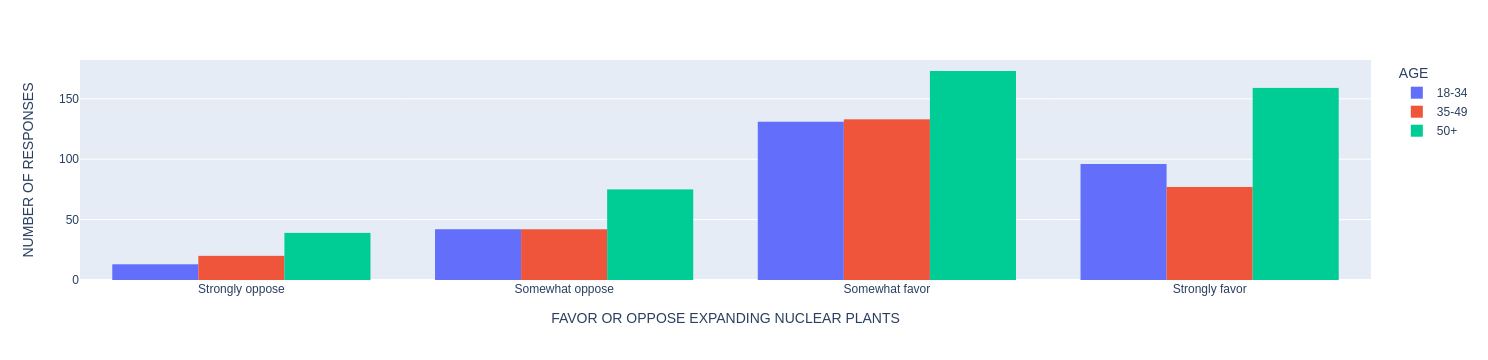

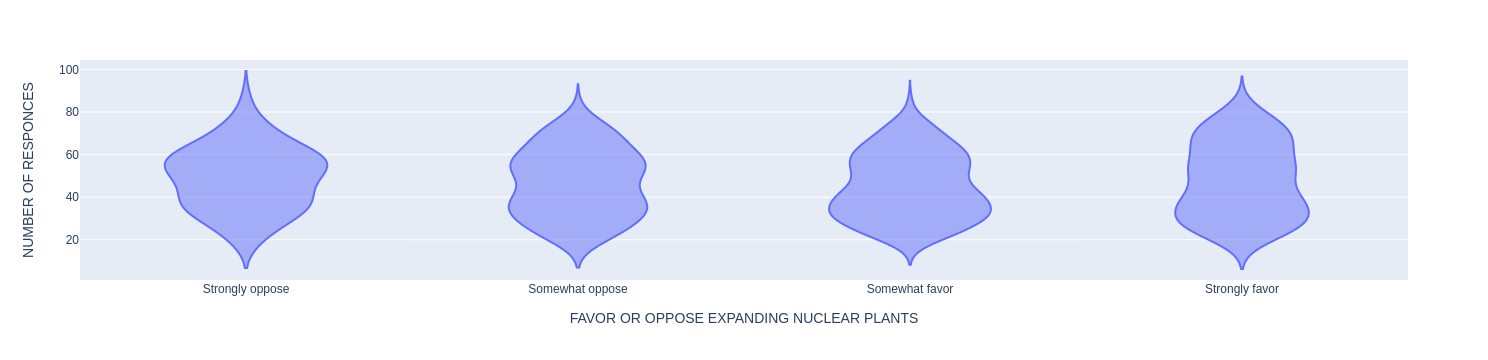

In [19]:
# Update this one to use Q2 instead of hAge1. Find the mean or something
# Maybe use a percentage or something 
fig = px.histogram(dataframe1, x="Q10", color="hAge1", barmode="group").update_xaxes(categoryorder='array', categoryarray=["Strongly oppose", "Somewhat oppose", "Somewhat favor", "Strongly favor"]).update_layout(
xaxis_title="FAVOR OR OPPOSE EXPANDING NUCLEAR PLANTS", yaxis_title="NUMBER OF RESPONSES", legend_title="AGE",
)
fig.show()

# Q2 is exact age
fig = px.violin(dataframe1, x="Q10", y="Q2").update_xaxes(categoryorder='array', categoryarray=["Strongly oppose", "Somewhat oppose", "Somewhat favor", "Strongly favor"]).update_layout(
xaxis_title="FAVOR OR OPPOSE EXPANDING NUCLEAR PLANTS", yaxis_title="NUMBER OF RESPONCES", legend_title="AGE OF RESPONDENT",
)
fig.show()

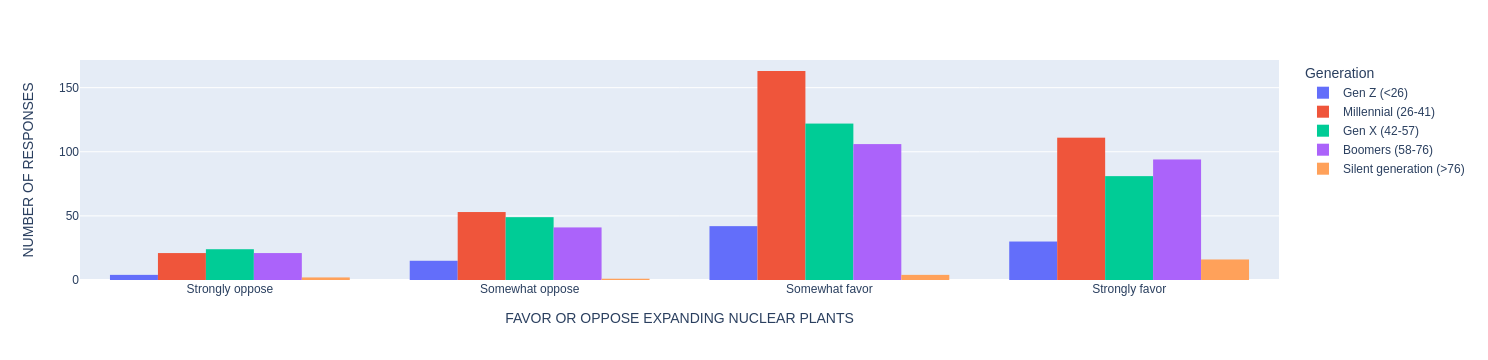

In [12]:
fig = px.histogram(dataframe1, x="Q10", color="hAge2", barmode="group").update_xaxes(categoryorder='array', categoryarray=["Strongly oppose", "Somewhat oppose", "Somewhat favor", "Strongly favor"]).update_layout(
xaxis_title="FAVOR OR OPPOSE EXPANDING NUCLEAR PLANTS", yaxis_title="NUMBER OF RESPONSES", legend_title="Generation",
)
fig.show()

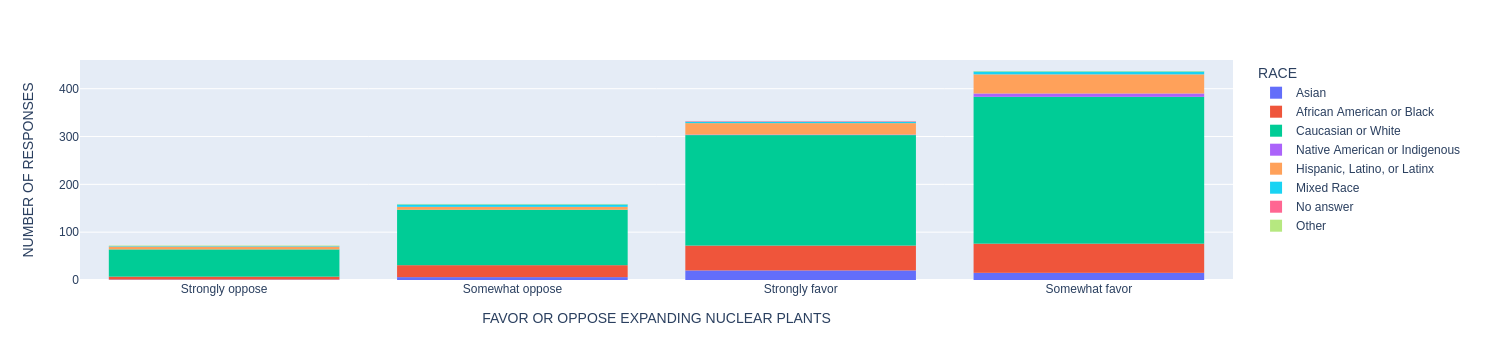

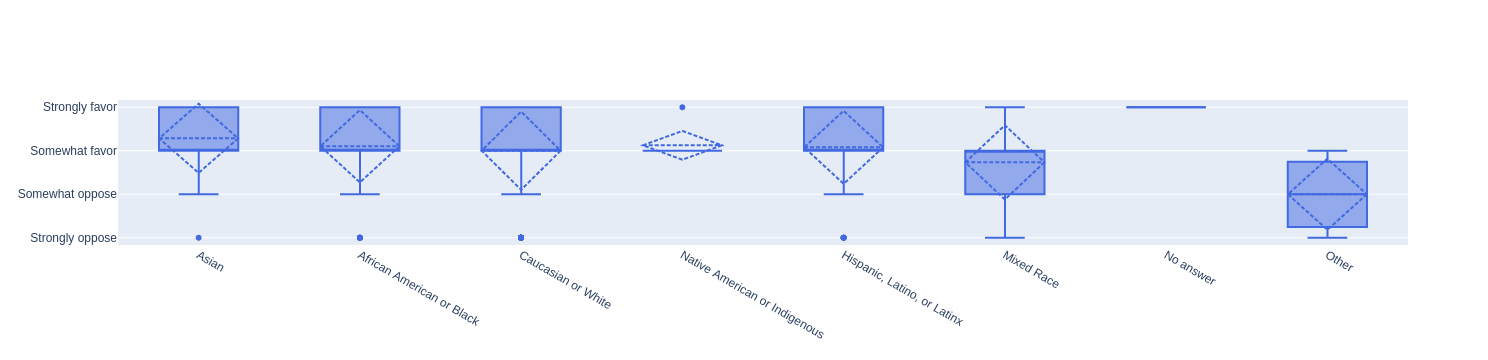

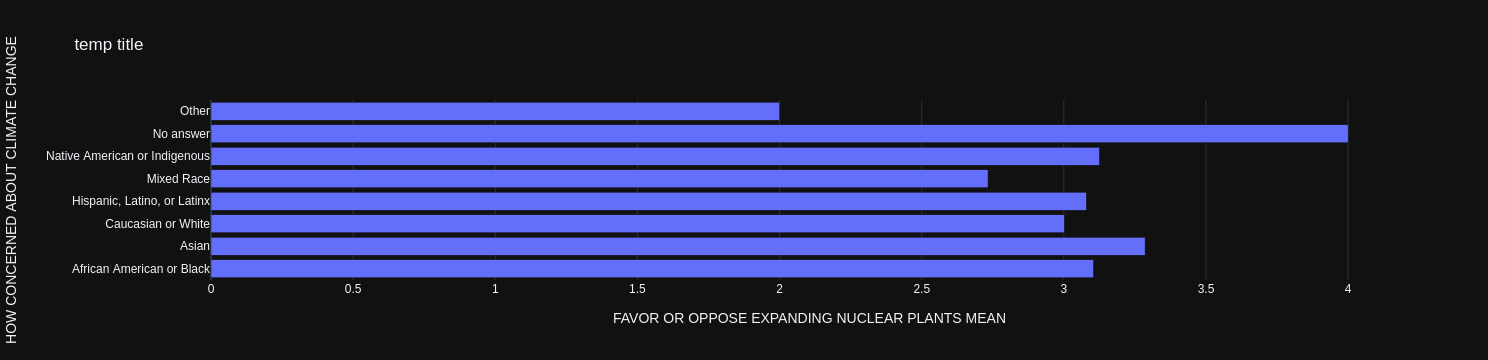

In [29]:
fig = px.histogram(dataframe1, x="Q10", color="Q3").update_xaxes(categoryorder='array', categoryarray=["Strongly oppose", "Somewhat oppose", "Somewhat favor", "Strongly favor"]).update_xaxes(categoryorder='total ascending').update_layout(
xaxis_title="FAVOR OR OPPOSE EXPANDING NUCLEAR PLANTS", yaxis_title="NUMBER OF RESPONSES", legend_title="RACE",
)
fig.show()

fig = go.Figure()
fig.add_trace(go.Box(
    y=dataframe1["Q10"],
    x=dataframe1["Q3"],
    name='Mean & SD',
    marker_color='royalblue',
    boxmean='sd' # represent mean and standard deviation
)).update_yaxes(categoryorder='array', categoryarray=fav_list)
fig.show()

#Get mean
mean_df = mean_df_gen("Q3")

title = "temp title"
fig = px.bar(mean_df, x="Q10", y="Q3", template='plotly_dark', title=title).update_xaxes(categoryorder='array', categoryarray=fav_list).update_layout(
xaxis_title="FAVOR OR OPPOSE EXPANDING NUCLEAR PLANTS MEAN", yaxis_title="HOW CONCERNED ABOUT CLIMATE CHANGE",
)
fig.show()


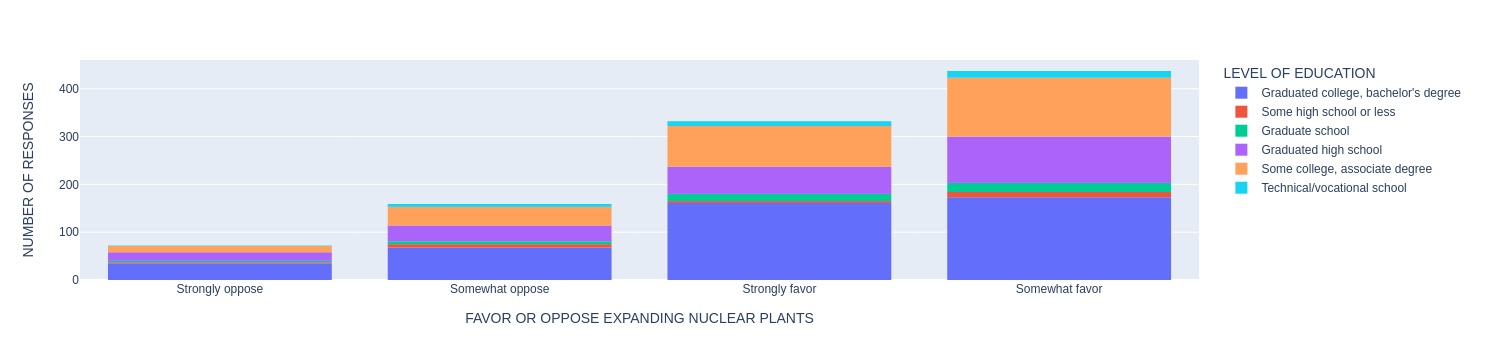

In [14]:
fig = px.histogram(dataframe1, x="Q10", color="Q4").update_xaxes(categoryorder='array', categoryarray=["Strongly oppose", "Somewhat oppose", "Somewhat favor", "Strongly favor"]).update_xaxes(categoryorder='total ascending').update_layout(
xaxis_title="FAVOR OR OPPOSE EXPANDING NUCLEAR PLANTS", yaxis_title="NUMBER OF RESPONSES", legend_title="LEVEL OF EDUCATION",
)
fig.show()